In [28]:
# Importing the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import pyshark
from scapy.all import *
import ipaddress
from datetime import datetime
import json
import networkx as nx



In [2]:
# Import necessary libraries
import pandas as pd

# Specify the path to your dataset
file_path = "C:/Users/Hp/Desktop/Project/Orginal data set.csv" # Replace with your actual file path

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Print the DataFrame
print(data)


           No.        Time        Source   Destination Protocol  Length  \
0            1    0.000000  172.16.2.191  172.16.3.254      TCP   36223   
1            2    0.000525  172.16.3.254  172.16.2.191      TCP      60   
2            3    0.000777  172.16.3.254  172.16.2.191      TCP      60   
3            4    0.001154  172.16.3.254  172.16.2.191      TCP      60   
4            5    0.001436  172.16.3.254  172.16.2.191      TCP      60   
...        ...         ...           ...           ...      ...     ...   
248828  248829  441.816487  172.16.3.254  172.16.2.191      TCP      64   
248829  248830  441.864682  172.16.2.191  172.16.3.254      TCP      54   
248830  248831  441.867251  172.16.2.191  172.16.3.254      TCP   62834   
248831  248832  441.867272  172.16.2.191  172.16.3.254      TCP   59549   
248832  248833  441.868043  172.16.3.254  172.16.2.191      TCP      60   

                                                     Info  
0       11100  >  49256 [PSH, ACK] Seq=

In [3]:
def extract_flags(info):
    match = re.search(r'\[(.*?)\]', info)  # Look for content within square brackets []
    if match:
        return match.group(1)  # Return the matched flags (e.g., "PSH, ACK")
    return None  # Return None if no flags are found

# Apply the function to the 'Info' column and create a new 'Flags' column
data['Flags'] = data['Info'].apply(extract_flags)

# Fill missing values in the 'Flags' column with "FIN, URG"
data['Flags'] = data['Flags'].fillna('FIN')
data['Flags'] = data['Flags'].fillna('URG')

# Display a preview of the dataset with the new column
data.head()


,No.,Time,Source,Destination,Protocol,Length,Info,Flags
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK"
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK


In [142]:
# Define a mapping of protocols to OSI layers
protocol_to_osi = {
    "ARP": "Data Link (Layer 2)",
    "BROWSER": "Application (Layer 7)",
    "DNS": "Application (Layer 7)",
    "FMTP": "Session (Layer 5)",
    "HTTP": "Application (Layer 7)",
    "HTTP/XML": "Application (Layer 7)",
    "HTTPS": "Application (Layer 7)",
    "FTP": "Application (Layer 7)",
    "SMTP": "Application (Layer 7)",
    "TLS": "Presentation (Layer 6)",
    "SSL": "Presentation (Layer 6)",
    "NetBIOS": "Session (Layer 5)",
    "PPTP": "Session (Layer 5)",
    "TCP": "Transport (Layer 4)",
    "UDP": "Transport (Layer 4)",
    "IP": "Network (Layer 3)",
    "ICMP": "Network (Layer 3)",
    "Ethernet": "Data Link (Layer 2)",
    "MAC": "Data Link (Layer 2)",
    "IPv4": "Network (Layer 3)",
    "MDNS": "Application (Layer 7)",
    "MS-DO": "Application (Layer 7)",
    "NBNS": "Application (Layer 7)",
    "OUIC": "Data Link (Layer 2)",
    "SMPP": "Application (Layer 7)",
    "SSDP": "Application (Layer 7)",
    "TCP": "Transport (Layer 4)",
    "TCP, HiPerConTracer": "Transport (Layer 4)",
    "TLSv1.2": "Presentation (Layer 6)",
    "TLSv1.3": "Presentation (Layer 6)",
    "UDP": "Transport (Layer 4)",
    "UDP/XML": "Transport (Layer 4)",
}

# Assign OSI layers based on the Protocol column
data['OSI Layer'] = data['Protocol'].map(protocol_to_osi)

# For protocols not explicitly mapped, assign "Unknown"
data['OSI Layer'] = data['OSI Layer'].fillna("Unknown")

# Display a preview of the dataset with the new column
data.head()


,No.,Time,Source,Destination,Protocol,Length,Info,Flags,OSI Layer
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK",Transport (Layer 4)
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK,Transport (Layer 4)
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK,Transport (Layer 4)
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK,Transport (Layer 4)
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK,Transport (Layer 4)


In [5]:
import ipaddress

# Function to classify IP addresses
def classify_ip(ip):
    try:
        addr = ipaddress.ip_address(ip)
        if addr.is_private:
            return "Private IP"
        elif addr.is_loopback:
            return "Loopback"
        elif addr.is_multicast:
            return "Multicast"
        elif addr == ipaddress.IPv4Address("255.255.255.255"):
            return "Broadcast"
        else:
            return "Public IP"
    except ValueError:
        return "Invalid IP"

# Apply the classification function to Source and Destination columns
data['Source Type'] = data['Source'].apply(classify_ip)
data['Destination Type'] = data['Destination'].apply(classify_ip)

# Display the updated dataset with Source Type and Destination Type columns
data.head()


,No.,Time,Source,Destination,Protocol,Length,Info,Flags,Source Type,Destination Type
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK",Private IP,Private IP
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK,Private IP,Private IP
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK,Private IP,Private IP
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK,Private IP,Private IP
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK,Private IP,Private IP


In [8]:
# Add a new column "ISP" with the value "Ready Link" for all rows
data['ISP'] = 'Ready Link'

# Display the updated DataFrame
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Flags,Source Type,Destination Type,ISP
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK",Private IP,Private IP,Ready Link
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK,Private IP,Private IP,Ready Link
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK,Private IP,Private IP,Ready Link
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK,Private IP,Private IP,Ready Link
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK,Private IP,Private IP,Ready Link


In [148]:
#add the Payload length 
data['Payload Length'] = data['Length'] - 20 
data

,No.,Time,Source,Destination,Protocol,Length,Info,Flags,OSI Layer,Source Type,Destination Type,ISP,Payload Length
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK",Transport (Layer 4),Private IP,Private IP,Ready Link,36203
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK,Transport (Layer 4),Private IP,Private IP,Ready Link,40
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK,Transport (Layer 4),Private IP,Private IP,Ready Link,40
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK,Transport (Layer 4),Private IP,Private IP,Ready Link,40
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK,Transport (Layer 4),Private IP,Private IP,Ready Link,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248828,248829,441.816487,172.16.3.254,172.16.2.191,TCP,64,"49256 > 11100 [PSH, ACK] Seq=46511 Ack=29478...","PSH, ACK",Transport (Layer 4),Private IP,Private IP,Ready Link,44
248829,248830,441.864682,172.16.2.191,172.16.3.254,TCP,54,11100 > 49256 [ACK] Seq=294784122 Ack=46521 ...,ACK,Transport (Layer 4),Private IP,Private IP,Ready Link,34
248830,248831,441.867251,172.16.2.191,172.16.3.254,TCP,62834,11100 > 49256 [ACK] Seq=294784122 Ack=46521 ...,ACK,Transport (Layer 4),Private IP,Private IP,Ready Link,62814
248831,248832,441.867272,172.16.2.191,172.16.3.254,TCP,59549,"11100 > 49256 [PSH, ACK] Seq=294846902 Ack=4...","PSH, ACK",Transport (Layer 4),Private IP,Private IP,Ready Link,59529


In [11]:
data['Bytes Sent and Received'] = np.random.randint(1000, 5000, size=len(data))


In [9]:
data['Peak Rate'] = np.random.uniform(10.0, 50.0, size=len(data))
data

,No.,Time,Source,Destination,Protocol,Length,Info,Flags,Source Type,Destination Type,ISP,Peak Rate
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK",Private IP,Private IP,Ready Link,31.494466
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK,Private IP,Private IP,Ready Link,14.769511
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK,Private IP,Private IP,Ready Link,19.543171
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK,Private IP,Private IP,Ready Link,25.229875
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK,Private IP,Private IP,Ready Link,33.273367
...,...,...,...,...,...,...,...,...,...,...,...,...
248828,248829,441.816487,172.16.3.254,172.16.2.191,TCP,64,"49256 > 11100 [PSH, ACK] Seq=46511 Ack=29478...","PSH, ACK",Private IP,Private IP,Ready Link,45.234518
248829,248830,441.864682,172.16.2.191,172.16.3.254,TCP,54,11100 > 49256 [ACK] Seq=294784122 Ack=46521 ...,ACK,Private IP,Private IP,Ready Link,46.237091
248830,248831,441.867251,172.16.2.191,172.16.3.254,TCP,62834,11100 > 49256 [ACK] Seq=294784122 Ack=46521 ...,ACK,Private IP,Private IP,Ready Link,16.554372
248831,248832,441.867272,172.16.2.191,172.16.3.254,TCP,59549,"11100 > 49256 [PSH, ACK] Seq=294846902 Ack=4...","PSH, ACK",Private IP,Private IP,Ready Link,22.704522


In [15]:
data['Peak Spike'] = np.random.uniform(1.0, 5.0, size=len(data))

In [17]:
data['Source_Port'], data['Destination_Port'] = zip(*data['Info'].apply(extract_ports))

# Fill missing values with the integral part of the mode
if data['Source_Port'].isnull().any():
    source_port_mode = data['Source_Port'].mode()[0]  # Get mode
    source_port_mode_int = int(source_port_mode)  # Integral part
    data['Source_Port'] = data['Source_Port'].fillna(source_port_mode_int)

if data['Destination_Port'].isnull().any():
    destination_port_mode = data['Destination_Port'].mode()[0]  # Get mode
    destination_port_mode_int = int(destination_port_mode)  # Integral part
    data['Destination_Port'] = data['Destination_Port'].fillna(destination_port_mode_int)


NameError: name 'extract_ports' is not defined

In [18]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Flags,Source Type,Destination Type,ISP,Peak Rate,Bytes Sent and Received,Peak Spike
0,1,0.000000,172.16.2.191,172.16.3.254,TCP,36223,"11100 > 49256 [PSH, ACK] Seq=1 Ack=1 Win=409...","PSH, ACK",Private IP,Private IP,Ready Link,31.494466,2821,4.198040
1,2,0.000525,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=2921 Win=8191 ...,ACK,Private IP,Private IP,Ready Link,14.769511,2354,4.472388
2,3,0.000777,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=5841 Win=8191 ...,ACK,Private IP,Private IP,Ready Link,19.543171,3887,1.285500
3,4,0.001154,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=10221 Win=8191...,ACK,Private IP,Private IP,Ready Link,25.229875,3904,4.486394
4,5,0.001436,172.16.3.254,172.16.2.191,TCP,60,49256 > 11100 [ACK] Seq=1 Ack=13141 Win=8191...,ACK,Private IP,Private IP,Ready Link,33.273367,3274,2.983490


In [20]:
data.head 

<bound method NDFrame.head of            No.        Time        Source   Destination Protocol  Length  \
0            1    0.000000  172.16.2.191  172.16.3.254      TCP   36223   
1            2    0.000525  172.16.3.254  172.16.2.191      TCP      60   
2            3    0.000777  172.16.3.254  172.16.2.191      TCP      60   
3            4    0.001154  172.16.3.254  172.16.2.191      TCP      60   
4            5    0.001436  172.16.3.254  172.16.2.191      TCP      60   
...        ...         ...           ...           ...      ...     ...   
248828  248829  441.816487  172.16.3.254  172.16.2.191      TCP      64   
248829  248830  441.864682  172.16.2.191  172.16.3.254      TCP      54   
248830  248831  441.867251  172.16.2.191  172.16.3.254      TCP   62834   
248831  248832  441.867272  172.16.2.191  172.16.3.254      TCP   59549   
248832  248833  441.868043  172.16.3.254  172.16.2.191      TCP      60   

                                                     Info     Flags  

In [24]:
data.to_csv("Updated_Data set.csv" , index=False)

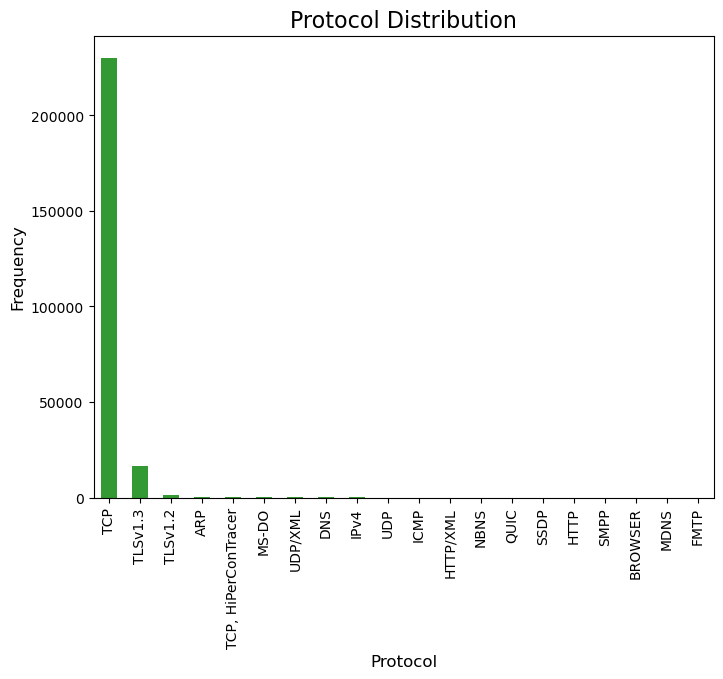

In [194]:
plt.figure(figsize=(8, 6))
protocol_counts = data['Protocol'].value_counts()
protocol_counts.plot(kind='bar', color='green', alpha=0.8)
plt.title('Protocol Distribution', fontsize=16)
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

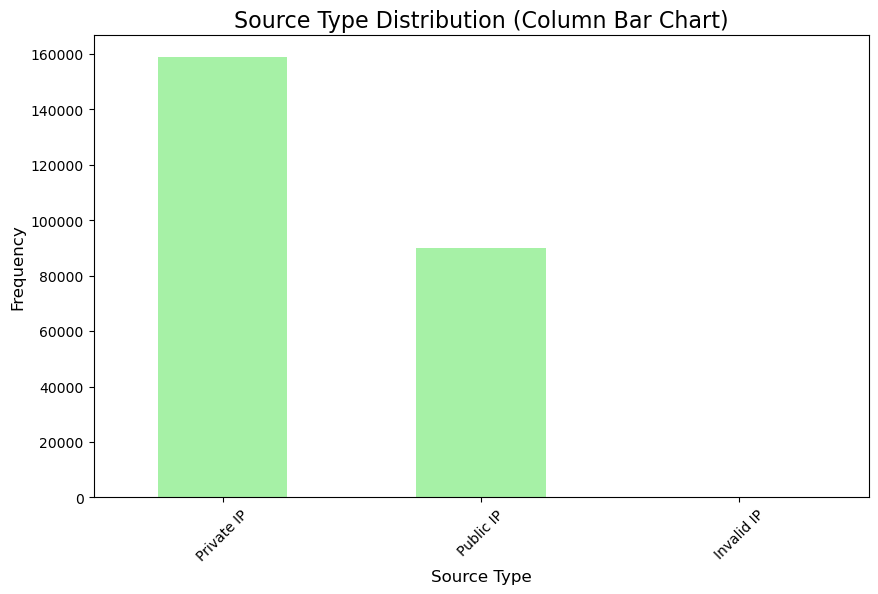

In [219]:
plt.figure(figsize=(10, 6))
source_type_counts = data['Source Type'].value_counts()
source_type_counts.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Source Type Distribution (Column Bar Chart)', fontsize=16)
plt.xlabel('Source Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [32]:
if 'Source' in data.columns and 'Target' in data.columns:
    # Create a graph
    G = nx.Graph()
    
    # Add edges from the dataframe
    for _, row in data.iterrows():
        G.add_edge(row['Source'], row['Target'])
    
    # Draw the network graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title("Network Graph Visualization")
    plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_18792\2999360303.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_spike_group = data.groupby('Peak Spike Range')['Peak Rate'].mean()


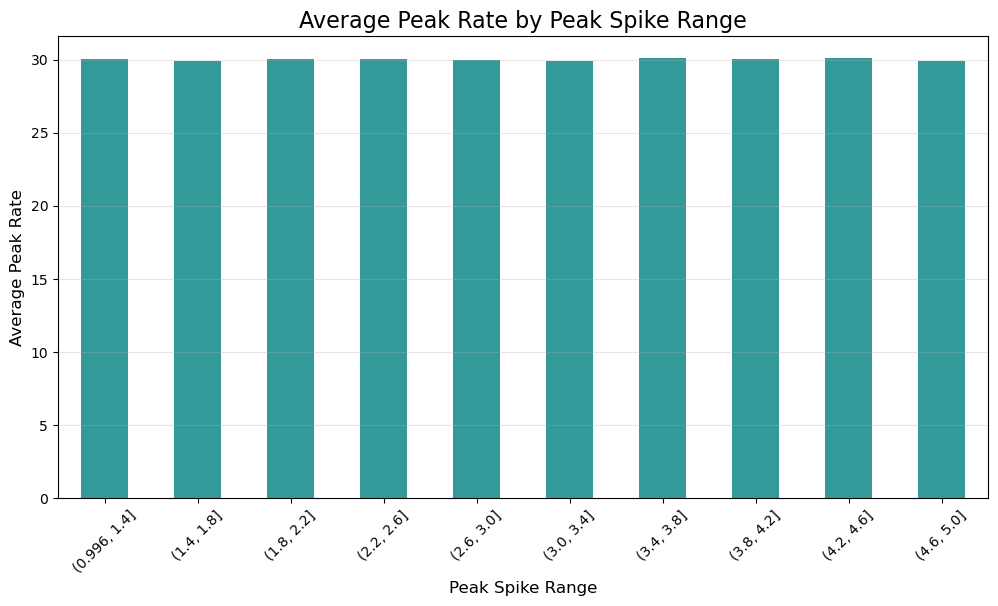

In [231]:
# Group data by ranges of 'Peak Spike' and calculate the average 'Peak Rate' for each group
data['Peak Spike Range'] = pd.cut(data['Peak Spike'], bins=10)  # Create 10 ranges for Peak Spike
peak_spike_group = data.groupby('Peak Spike Range')['Peak Rate'].mean()

# Bar Chart: Average Peak Rate for each Peak Spike Range
plt.figure(figsize=(12, 6))
peak_spike_group.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Average Peak Rate by Peak Spike Range', fontsize=16)
plt.xlabel('Peak Spike Range', fontsize=12)
plt.ylabel('Average Peak Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


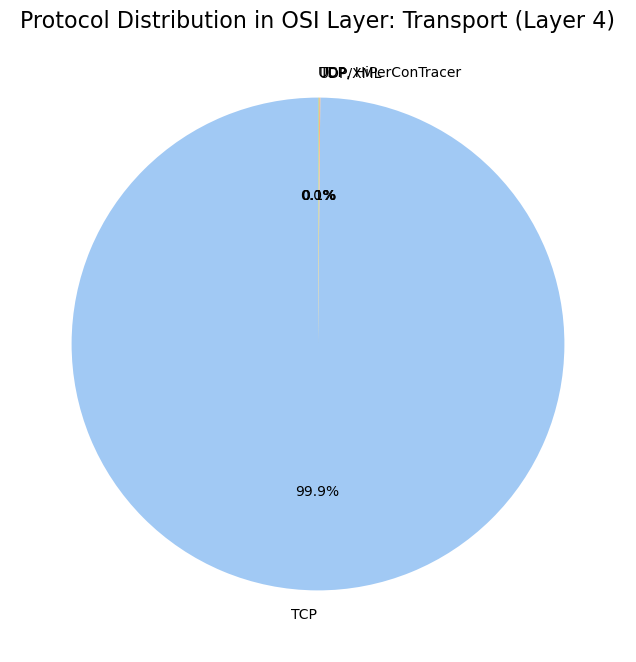

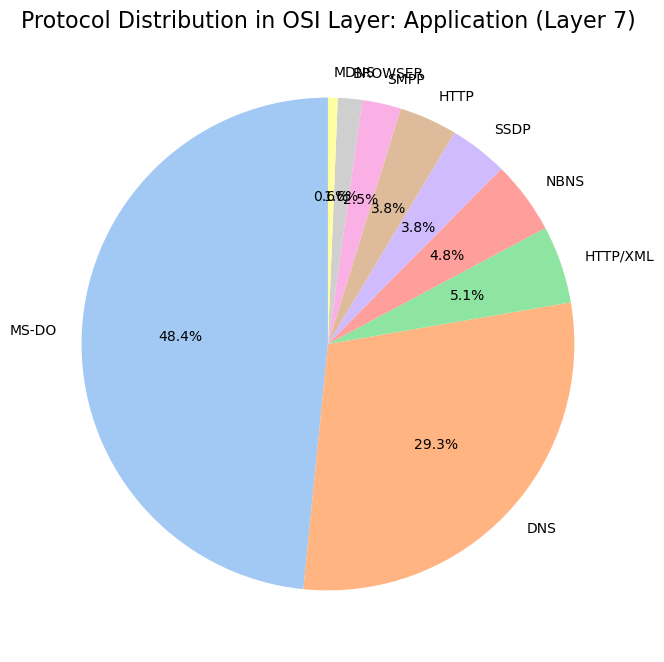

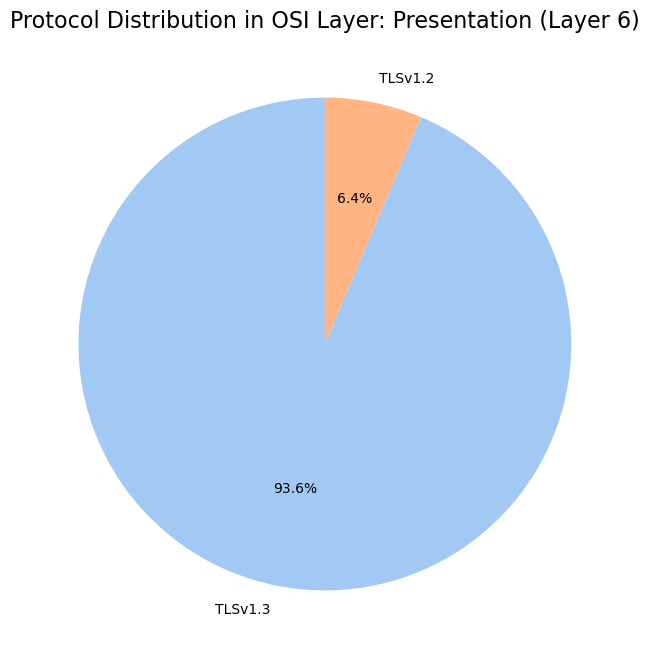

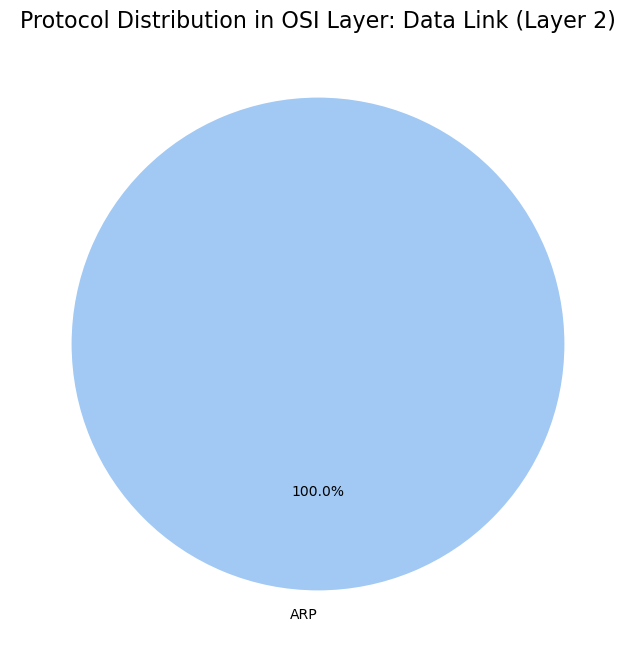

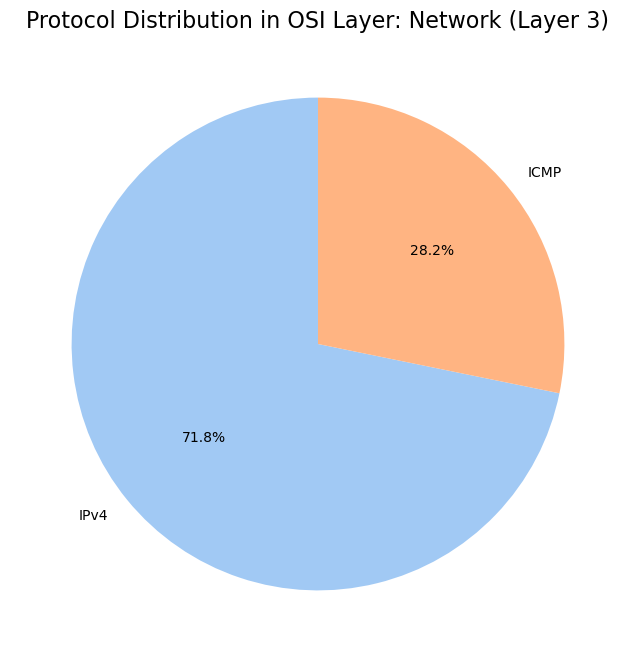

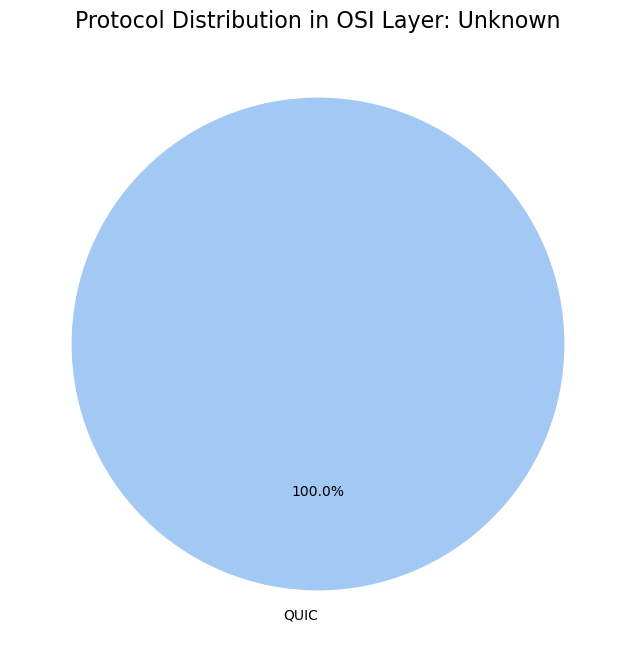

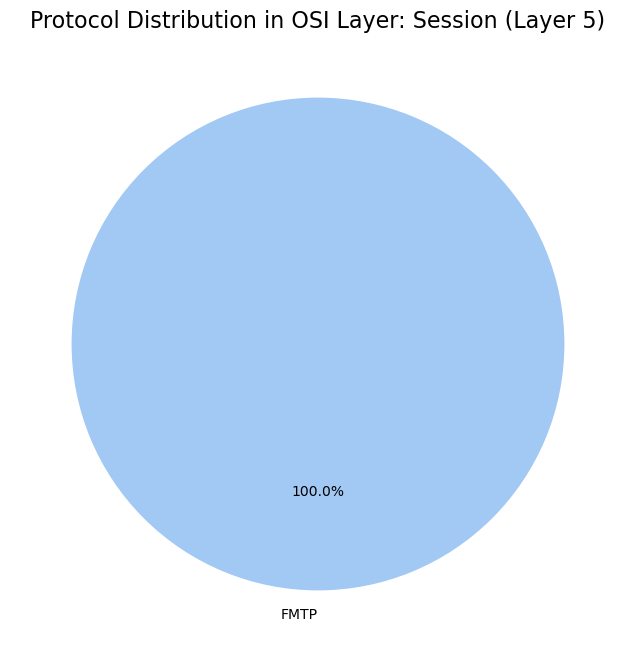

In [243]:



# Visualization 3: Pie Charts for Protocol Proportion in Each OSI Layer
osi_layers = data['OSI Layer'].unique()
for osi_layer in osi_layers:
    plt.figure(figsize=(8, 8))
    layer_protocol_counts = data[data['OSI Layer'] == osi_layer]['Protocol'].value_counts()
    layer_protocol_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Protocol Distribution in OSI Layer: {osi_layer}', fontsize=16)
    plt.ylabel('')  # Remove y-axis label for clarity
    plt.show()
